In [7]:
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import ks_2samp
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import statsmodels
from statsmodels.stats.diagnostic import kstest_normal

# Открываем файл .xls
workbook = xlrd.open_workbook("C:/Users/Владимир/Downloads/Практика 8 scoring.xls")

# Получаем первый лист
sheet = workbook.sheet_by_index(0)

# Создаем пустой массив для хранения значений
values = []
values0 = []
values1 = []
array1 = []
array2 = []
# Проходим по всем строкам, начиная со второй (первая - заголовки)
for row_index in range(1, sheet.nrows):
    # Получаем значение из второго столбца
    value = sheet.cell_value(row_index, 2)
    # Получаем значение из седьмого столбца
    value1 = sheet.cell_value(row_index, 7)
    array2.append(value1)
    v = sheet.cell_value(row_index, 1)
    array1.append(v)
    # Добавляем значение в массив
    values.append(value)
    #для 3 задания делим выборки по какомуто бинарному признаку
    if(value1==0):
        values0.append(value)
    else:
        values1.append(value)
#values = np.random.normal(0, 1, 1000)

C:\Users\Владимир\AppData\Local\Temp\ipykernel_9444\1722231157.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, shade=True, label='Эмпирическая плотность')


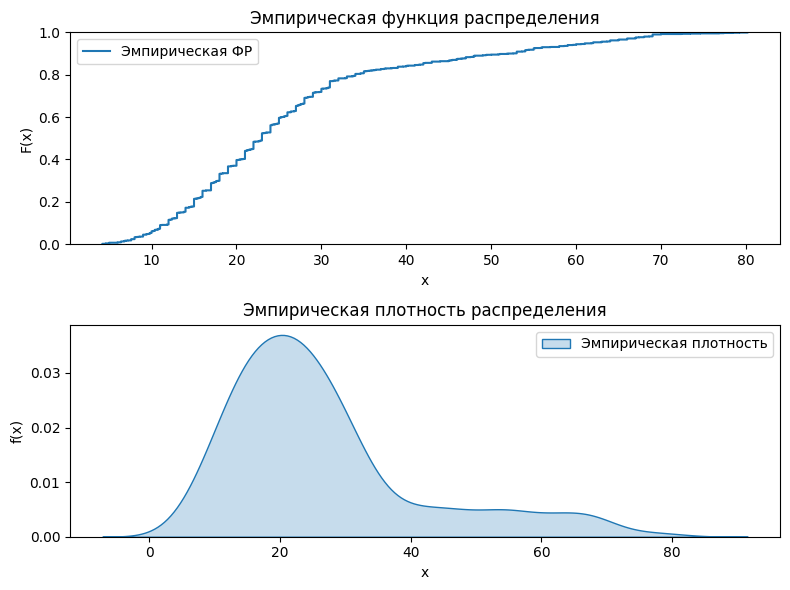

In [2]:
# Построим эмпирическую функцию распределения
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
ecdf = sns.ecdfplot(values, label='Эмпирическая ФР')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Эмпирическая функция распределения')

# Построим эмпирическую плотность распределения
plt.subplot(2, 1, 2)
sns.kdeplot(values, shade=True, label='Эмпирическая плотность')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Эмпирическая плотность распределения')

plt.tight_layout()
plt.show()

In [14]:
#гипотеза о нормальность 
#критерий колмогорова
me = np.mean(values)
st = np.std(values,ddof=1)
result = kstest(values, 'norm',args=(me,st))
print("KS статистика:", result[0])
print("p-значение:", result[1])



KS статистика: 0.1548793400910402
p-значение: 2.1558177883770097e-21


In [15]:
t_stat, p_val = ttest_ind(values0, values1, equal_var = False)
print(p_val)
print(np.mean(values1))
print(np.mean(values0))

1.2554744641610076e-88
35.764227642276424
17.70532544378698


In [5]:
result = ks_2samp(values0, values1)

# вывод результатов
print(f"KS статистика: {result[0]}")
print(f"p-значение: {result[1]}")

KS статистика: 0.5812887862606436
p-значение: 1.1295039111017112e-78


In [6]:
import pandas as pd

table = pd.crosstab(array1, array2)
print(table)
result = chi2_contingency(table)
print(result[1])


col_0  0.0  1.0
row_0          
0.0    122  206
1.0    195  192
2.0    139   81
3.0     34   10
4.0     17    3
3.6849986464421974e-12
